##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [106]:
# Import libraries
import tensorflow as tf



# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print(num_classes)
# Print the shape of the data to verify it is loaded correctly
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

10
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [107]:
# Define class names
class_names = ["t-shirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

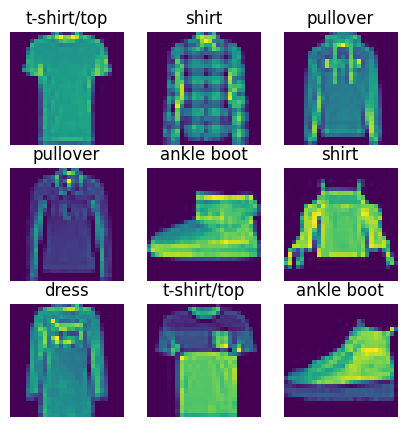

In [108]:

# Plot a 3x3 grid of random images from the dataset with their labels
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index])
    plt.title(class_names[y_train[index]])
    plt.axis("off")
plt.show()

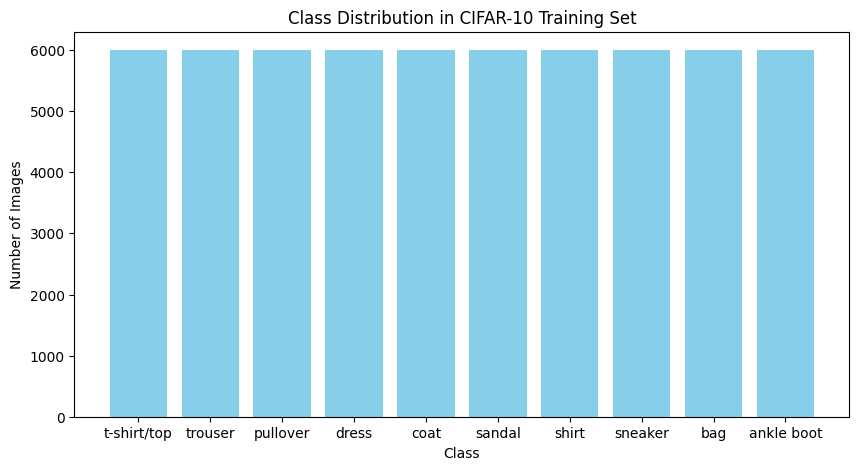

In [109]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train.flatten())
# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [128]:
# Import libraries
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Reload and preprocess cleanly
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize pixel values for x_train and x_test
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Reshape images to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Build a CNN model
data_augm = Sequential([layers.RandomFlip('Horizontal and Vertical')])
model = Sequential([

    data_augm,
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(32, (1,1), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_35 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [129]:
print("x_train shape:", x_train.shape)  # Should be (60000, 28, 28, 1)
print("y_train shape:", y_train.shape)  # Should be (60000,)
print("Data type:", x_train.dtype)      # Should be float32

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
Data type: float32


In [130]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)

In [131]:
history= model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1,callbacks=[lr_callback, early_stopping],verbose=1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7717 - loss: 0.6127 - val_accuracy: 0.8375 - val_loss: 0.4478 - learning_rate: 0.0010
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8432 - loss: 0.4209 - val_accuracy: 0.8482 - val_loss: 0.3970 - learning_rate: 0.0010
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8627 - loss: 0.3701 - val_accuracy: 0.8762 - val_loss: 0.3470 - learning_rate: 0.0010
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8752 - loss: 0.3370 - val_accuracy: 0.8800 - val_loss: 0.3201 - learning_rate: 0.0010
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8838 - loss: 0.3140 - val_accuracy: 0.8878 - val_loss: 0.3072 - learning_rate: 0.0010
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8888 - loss: 0.2974 - val_accuracy: 0.8915 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8949 - l

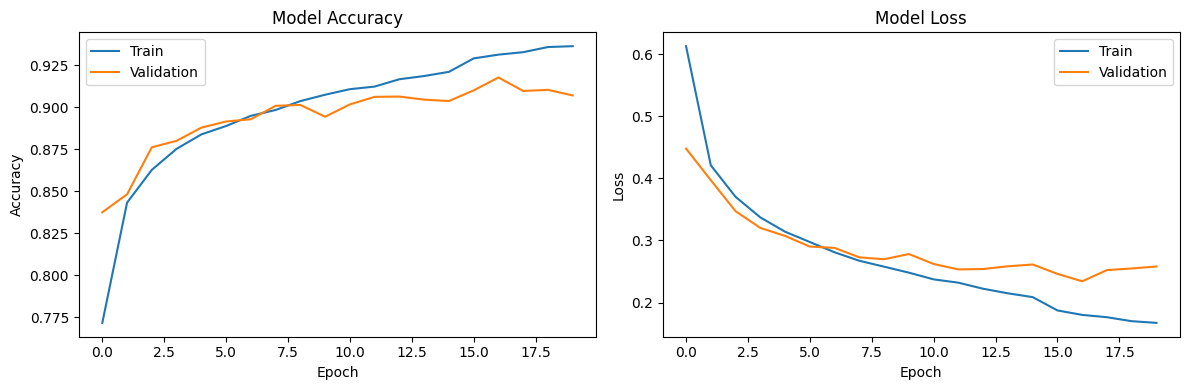

In [132]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [133]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9125 - loss: 0.2495


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


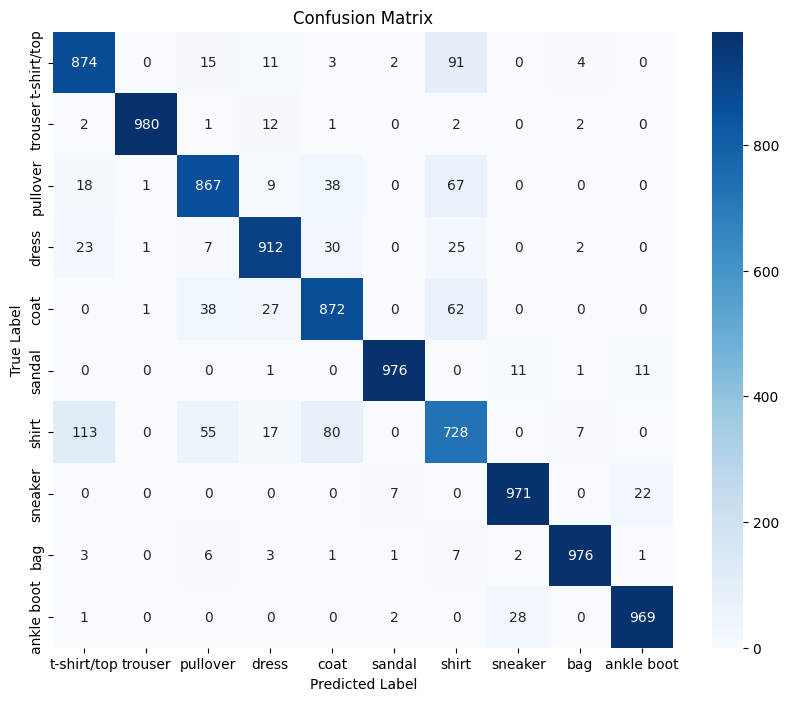

In [134]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

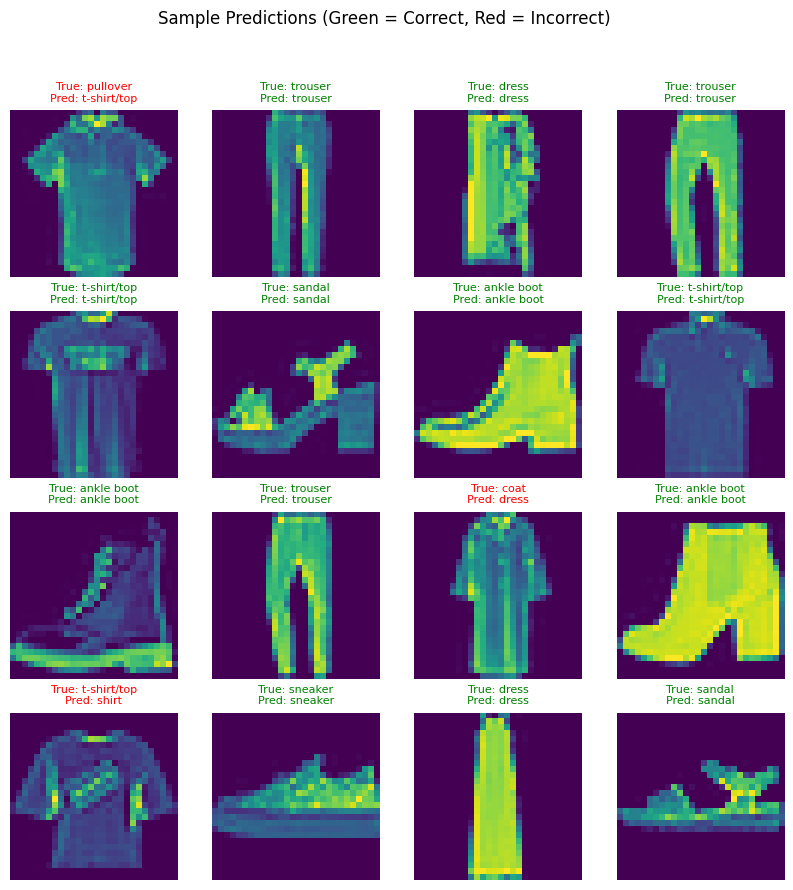

In [135]:
# Plot sample images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    index = np.random.randint(0, len(x_test))
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[index])
    true_label = class_names[y_true_classes[index]]
    pred_label = class_names[y_pred_classes[index]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=8)
    plt.axis("off")
plt.suptitle("Sample Predictions (Green = Correct, Red = Incorrect)")
plt.show()